# section 3 +4

In [2]:
import pandas as pd

# Load the data
data = pd.read_csv('final_data.csv')

# Show the first few rows of the data
data.head()


Unnamed: 0        Time  Max Temperature (°F)  Avg Temperature (°F)  \
0           0  2022-01-01                    73                  64.5   
1           1  2022-01-02                    63                  57.3   
2           2  2022-01-03                    50                  38.0   
3           3  2022-01-04                    42                  31.1   
4           4  2022-01-05                    55                  40.6   

   Min Temperature (°F)  Max Dew Point (°F)  Avg Dew Point (°F)  \
0                    54                  62                58.9   
1                    50                  61                54.4   
2                    26                  49                34.1   
3                    22                  26                23.3   
4                    34                  35                28.8   

   Min Dew Point (°F)  Max Humidity (%)  Avg Humidity (%)  Min Humidity (%)  \
0                  53                97              83.2                59   
1                  48               100              90.5                75   
2                  22                97              85.9                61   
3                  20                96              74.9                51   
4                  23                79              64.1                38   

   Max Wind Speed (mph)  Avg Wind Speed (mph)  Min Wind Speed (mph)  \
0                    18                  11.6                     0   
1                    16                   8.2                     0   
2                    43                  22.8                     8   
3                    12                   5.7                     0   
4                    15                   5.0                     0   

   Max Pressure (in)  Avg Pressure (in)  Min Pressure (in)  \
0               27.7               27.6               27.5   
1               27.6               27.6               27.5   
2               28.0               27.6               27.3   
3               28.1               28.0               27.9   
4               27.9               27.7               27.6   

   Total Precipitation (in)        City  
0                      0.00  London, UK  
1                      0.93  London, UK  
2                      0.65  London, UK  
3                      0.01  London, UK  
4                      0.00  London, UK

In [3]:
# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Checking for missing values
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                  0
Time                        0
Max Temperature (°F)        0
Avg Temperature (°F)        0
Min Temperature (°F)        0
Max Dew Point (°F)          0
Avg Dew Point (°F)          0
Min Dew Point (°F)          0
Max Humidity (%)            0
Avg Humidity (%)            0
Min Humidity (%)            0
Max Wind Speed (mph)        0
Avg Wind Speed (mph)        0
Min Wind Speed (mph)        0
Max Pressure (in)           0
Avg Pressure (in)           0
Min Pressure (in)           0
Total Precipitation (in)    0
City                        0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

# Sort data by city and time
data = data.sort_values(['City', 'Time'])

# Initialize sequence list
sequences_avg_tmep = []
sequences_max_diff_temp = []
sequences_avg_hu = []
sequences_max_diff_hu = []

# Iterate over each city
for city in data['City'].unique():
    city_data = data[data['City'] == city]
    
    # Create sequences of lengths varying from 7 to 30 days
    for seq_length in range(7, 31):
        for i in range(0, len(city_data), seq_length):
            sequence = city_data.iloc[i:i+seq_length]
            
            # Calculate the average temperature for the sequence
            avg_temp = sequence['Avg Temperature (°F)'].mean()
            avg_hu = sequence['Avg Humidity (%)'].mean()
            max_diff_temp = sequence['Avg Temperature (°F)'].max() - sequence['Avg Temperature (°F)'].min() 
            max_diff_hu = sequence['Avg Humidity (%)'].max() - sequence['Avg Humidity (%)'].min() 
            
            # Append the sequence data to our list
            sequences_avg_tmep.append([city, seq_length, avg_temp])
            sequences_avg_hu.append([city, seq_length, avg_hu])
            sequences_max_diff_temp.append([city, seq_length, max_diff_temp])
            sequences_max_diff_hu.append([city, seq_length, max_diff_hu])
            
# Convert to DataFrame
sequences_avg_temp_df = pd.DataFrame(sequences_avg_tmep, columns=['City', 'Sequence Length', 'Avg Temperature'])
sequences_avg_hu_df = pd.DataFrame(sequences_avg_hu, columns=['City', 'Sequence Length', 'Avg Hummidity'])
sequences_max_diff_temp_df = pd.DataFrame(sequences_max_diff_temp, columns=['City', 'Sequence Length', 'Max Difference Temperature'])
sequences_max_diff_hu_df = pd.DataFrame(sequences_max_diff_hu, columns=['City', 'Sequence Length', 'Max Difference Hummidity'])


# Encode the city names to numerical values
le = LabelEncoder()
sequences_avg_temp_df['City'] = le.fit_transform(sequences_avg_temp_df['City'])
sequences_avg_hu_df['City'] = le.fit_transform(sequences_avg_hu_df['City'])
sequences_max_diff_temp_df['City'] = le.fit_transform(sequences_max_diff_temp_df['City'])
sequences_max_diff_hu_df['City'] = le.fit_transform(sequences_max_diff_hu_df['City'])


sequences_avg_temp_df.name = 'Avg Temp'
sequences_avg_hu_df.name = 'Avg Hummidity'
sequences_max_diff_temp_df.name = 'Max Diff Temp'
sequences_max_diff_hu_df.name = 'Max Diff Hummidity'

sequences = [sequences_avg_temp_df, sequences_avg_hu_df, sequences_max_diff_temp_df, sequences_max_diff_hu_df]


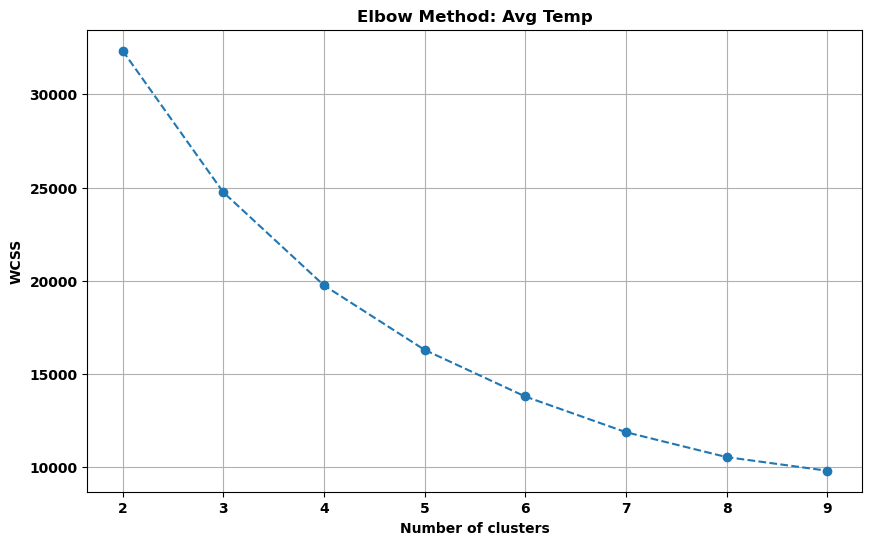

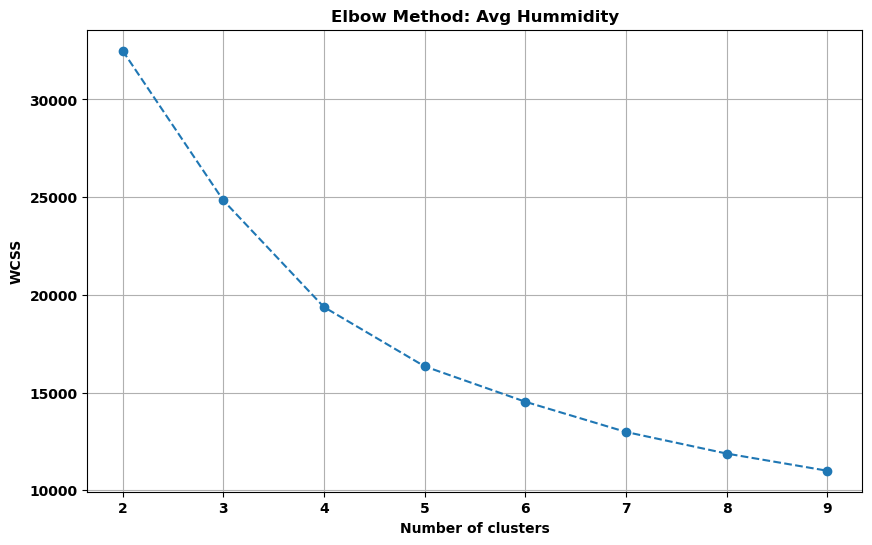

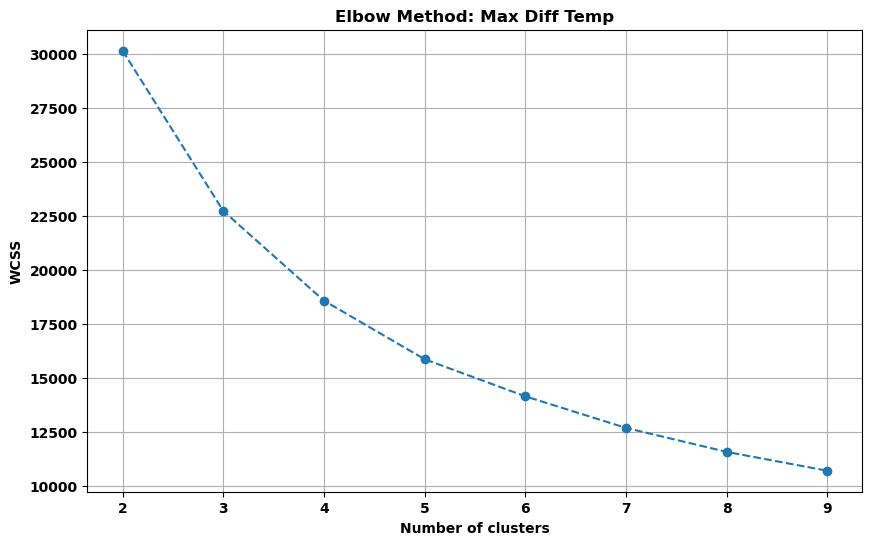

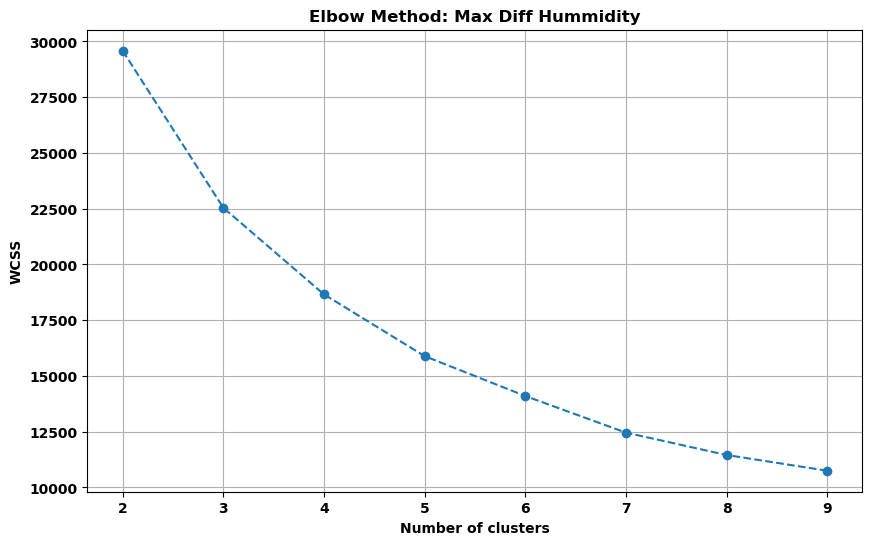

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

for sequence_df in sequences:
    # Standardize the data
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)

    # Define a range of possible clusters
    clusters_range = range(2, 10)

    # Calculate WCSS (Within-Cluster-Sum-of-Squares) for different numbers of clusters
    wcss = []
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(sequences_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS values
    plt.figure(figsize=(10, 6))
    plt.plot(clusters_range, wcss, marker='o', linestyle='--')
    plt.title('Elbow Method: ' + sequence_df.name)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()


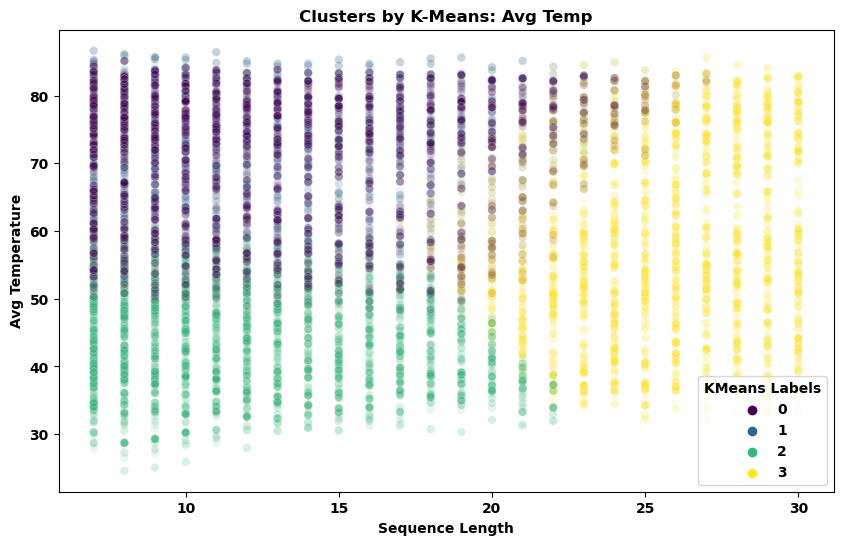

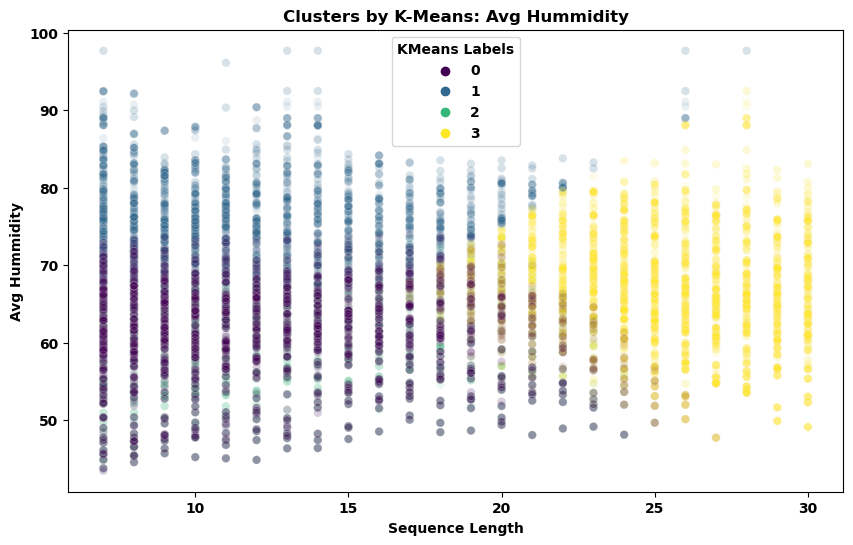

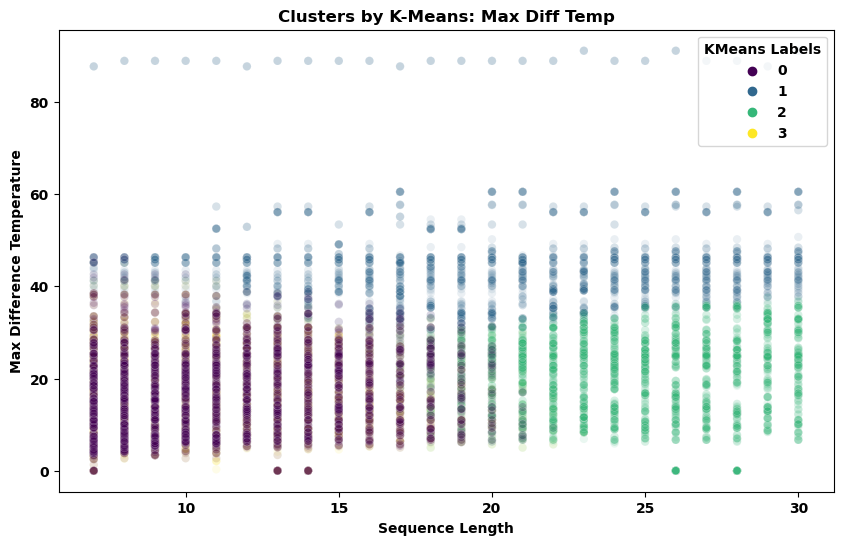

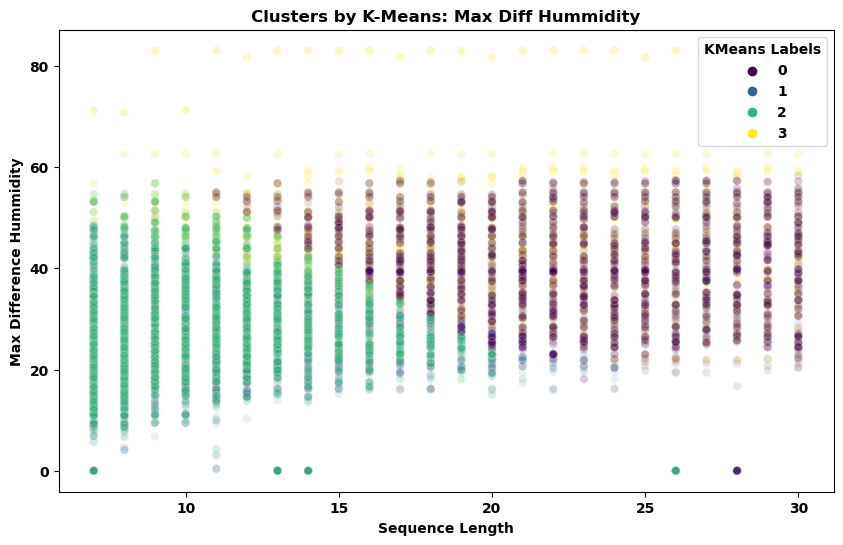

In [6]:
import seaborn as sns
clusters_per_sequence = [4,4,4,4]


for i in range(len(sequences)):
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i])
    # Fit K-Means
    kmeans = KMeans(n_clusters=clusters_per_sequence[i], random_state=42)
    sequences[i]['KMeans Labels'] = kmeans.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y=sequences[i].columns[2], hue='KMeans Labels', palette='viridis', alpha = 0.1)
    plt.title('Clusters by K-Means: ' + sequences[i].name)
    plt.show()


In [7]:
for i in sequences:
    print(i['KMeans Labels'])

0        2
1        2
2        2
3        2
4        2
        ..
14470    3
14471    3
14472    3
14473    3
14474    3
Name: KMeans Labels, Length: 14475, dtype: int32
0        1
1        2
2        1
3        2
4        2
        ..
14470    3
14471    3
14472    3
14473    3
14474    3
Name: KMeans Labels, Length: 14475, dtype: int32
0        3
1        3
2        3
3        3
4        3
        ..
14470    2
14471    2
14472    2
14473    1
14474    2
Name: KMeans Labels, Length: 14475, dtype: int32
0        1
1        1
2        1
3        1
4        3
        ..
14470    0
14471    0
14472    0
14473    0
14474    0
Name: KMeans Labels, Length: 14475, dtype: int32


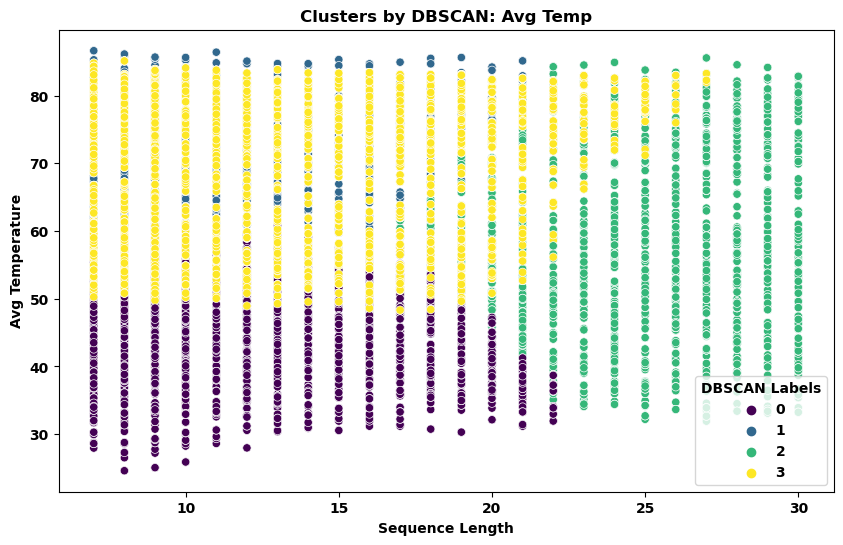

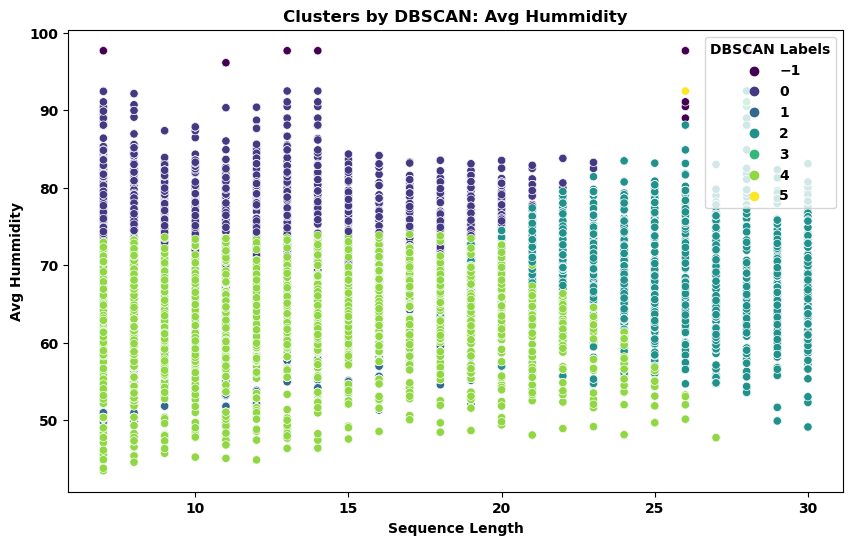

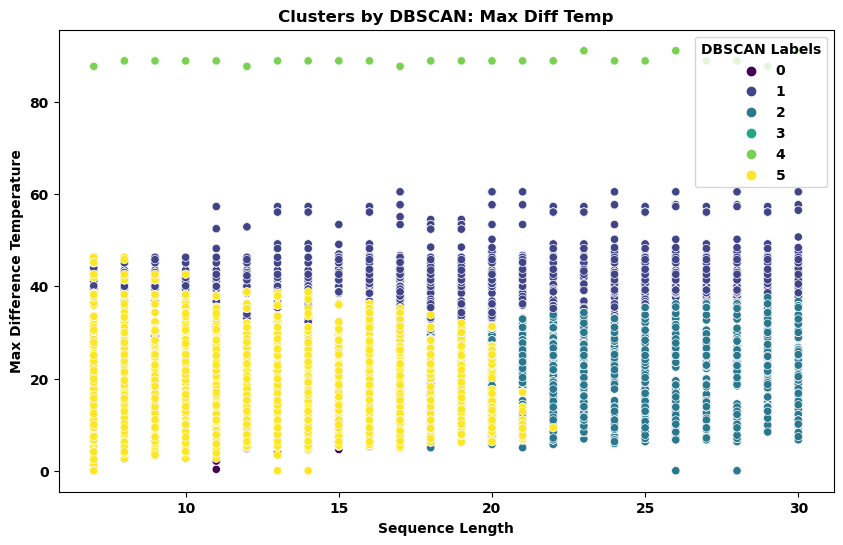

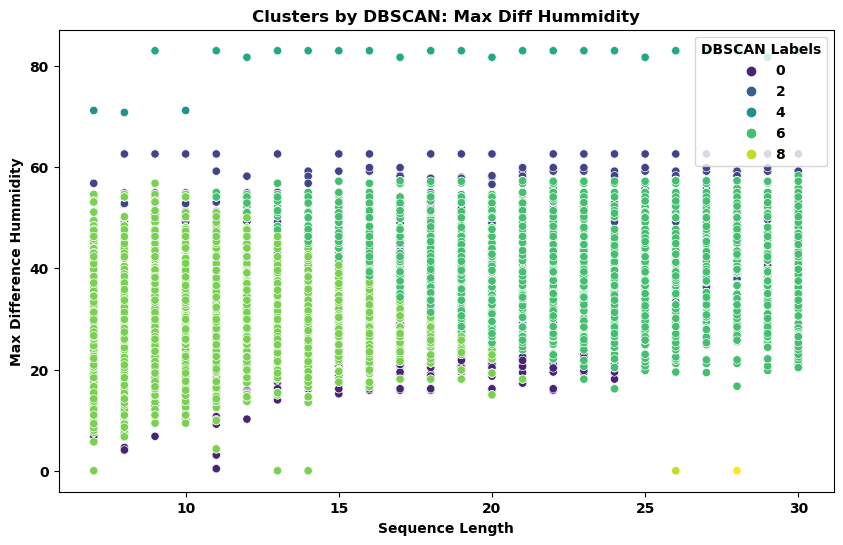

In [8]:
from sklearn.cluster import DBSCAN

for sequence_df in sequences:
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)
    # Fit DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    sequence_df['DBSCAN Labels'] = dbscan.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequence_df, x='Sequence Length', y=sequence_df.columns[2], hue='DBSCAN Labels', palette='viridis')
    plt.title('Clusters by DBSCAN: ' + sequence_df.name)
    plt.show()


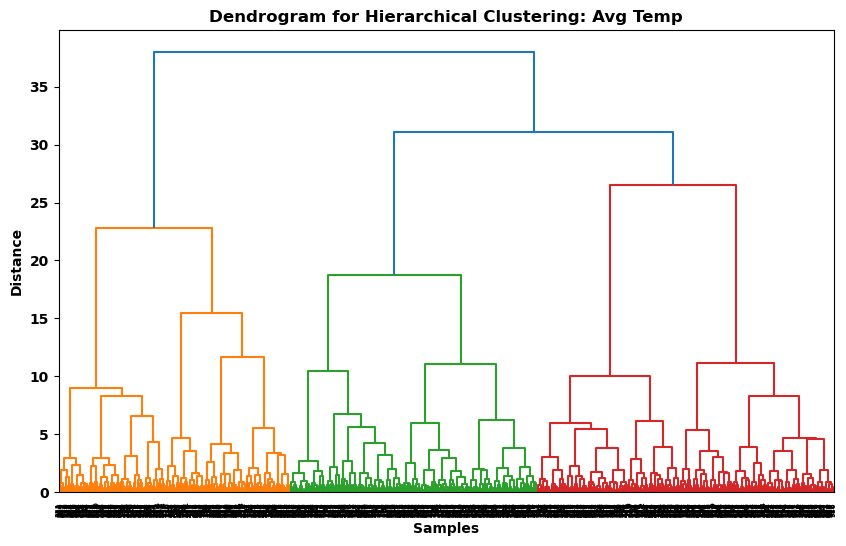

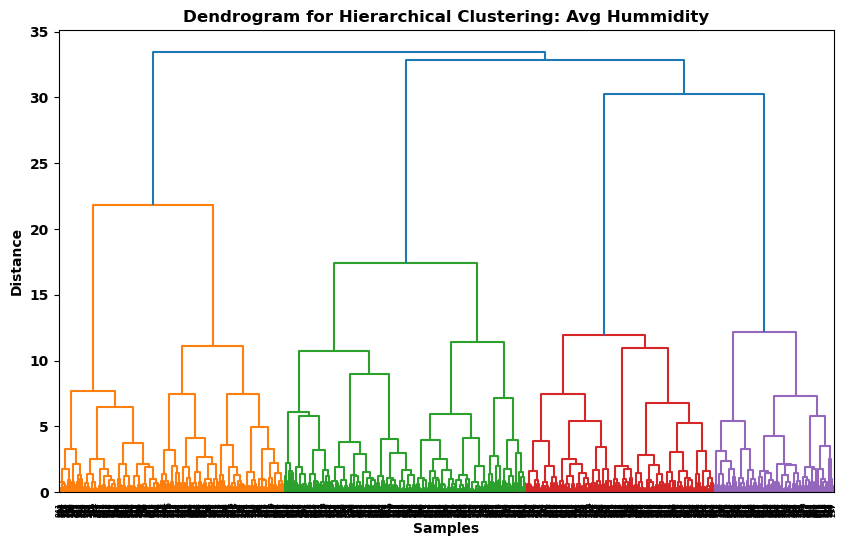

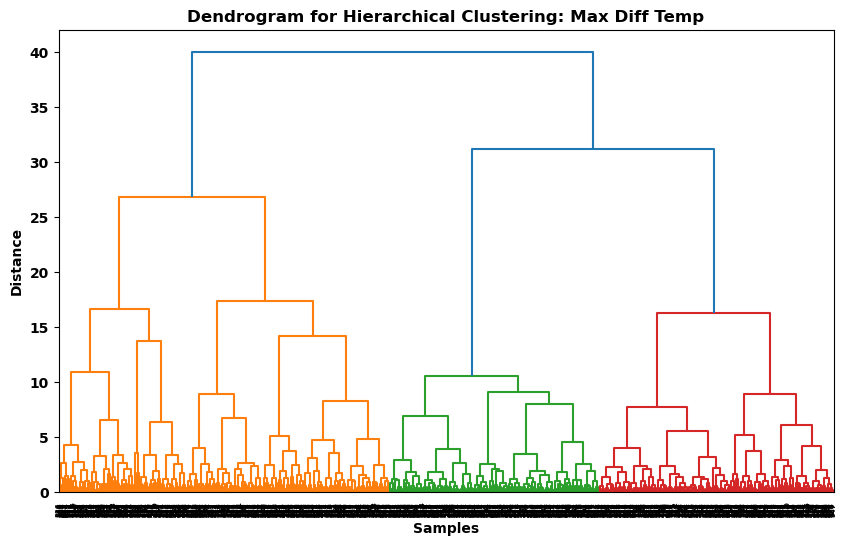

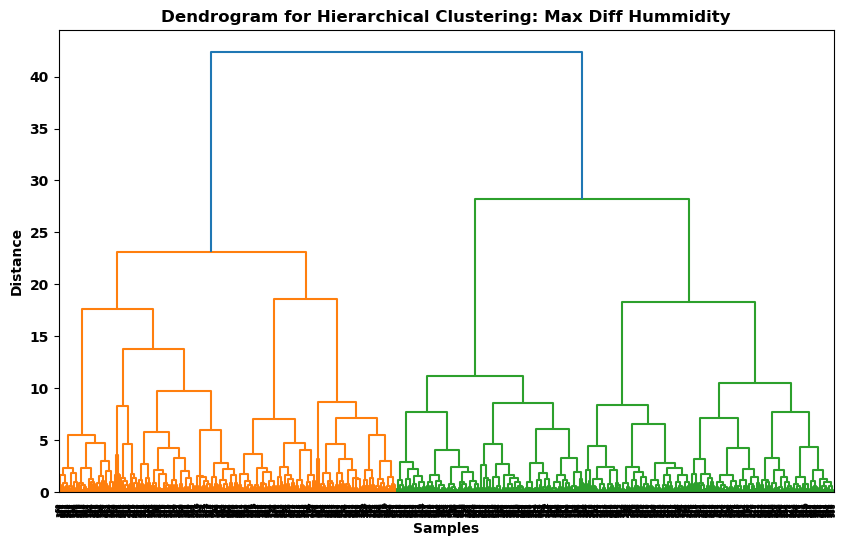

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt



for sequence_df in sequences:
    # Use only a subset of data for dendrogram for efficiency
    subset = sequence_df.sample(n=1000, random_state=42)

    # Standardize the subset
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df[sequence_df.columns[:3]])
    subset_scaled = scaler.transform(subset[sequence_df.columns[:3]])

    # Perform hierarchical clustering
    linked = linkage(subset_scaled, 'ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(linked)
    plt.title('Dendrogram for Hierarchical Clustering: ' + sequence_df.name)
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()





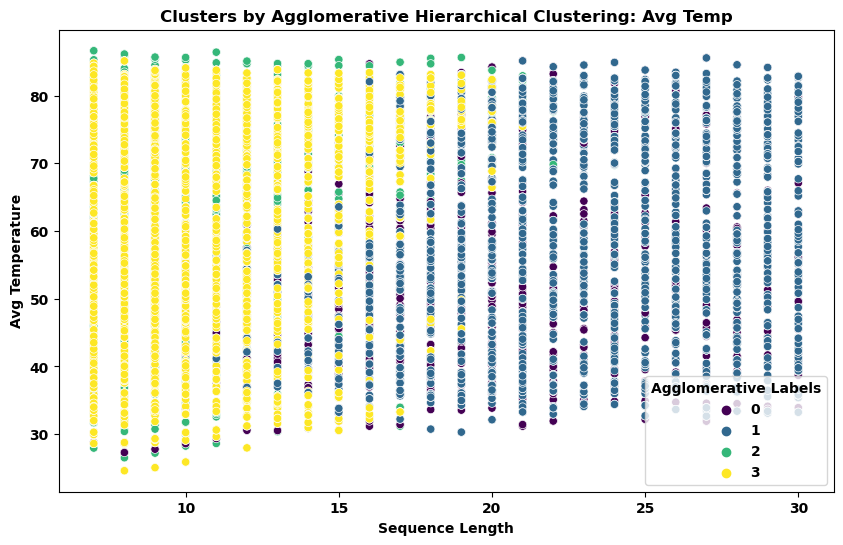

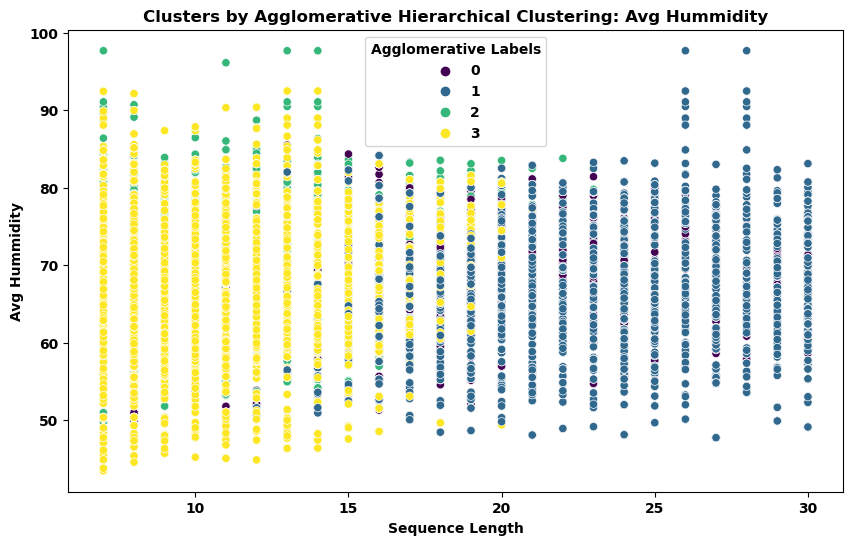

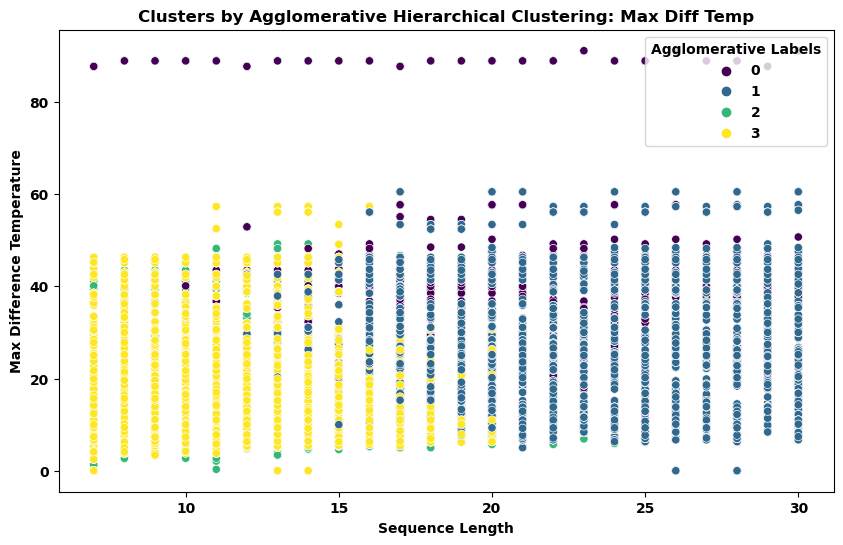

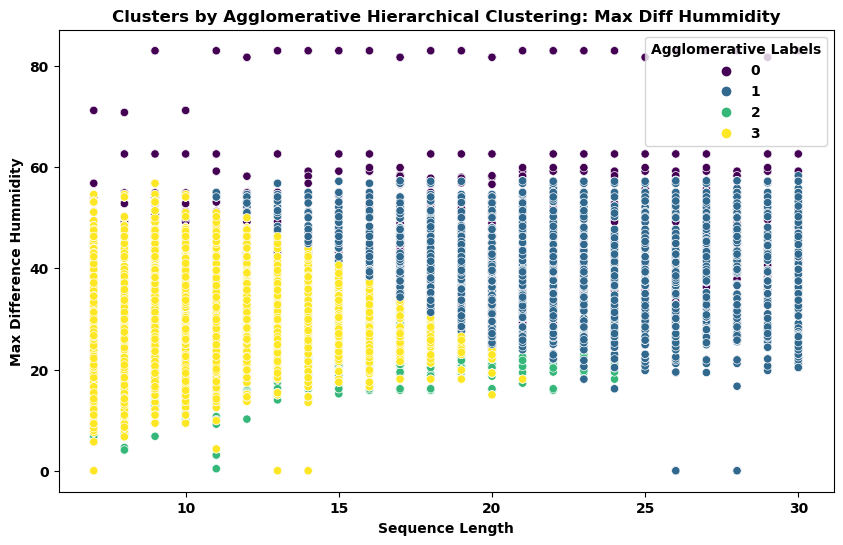

In [10]:
from sklearn.cluster import AgglomerativeClustering

clusters_per_sequence = [4,4,4,4]

for i in range(len(sequences)):

    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df)

    # Fit Agglomerative Hierarchical Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=clusters_per_sequence[i])
    sequences[i]['Agglomerative Labels'] = agg_clustering.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y= sequences[i].columns[2], hue='Agglomerative Labels', palette='viridis')
    plt.title('Clusters by Agglomerative Hierarchical Clustering: ' + sequences[i].name)
    plt.show()


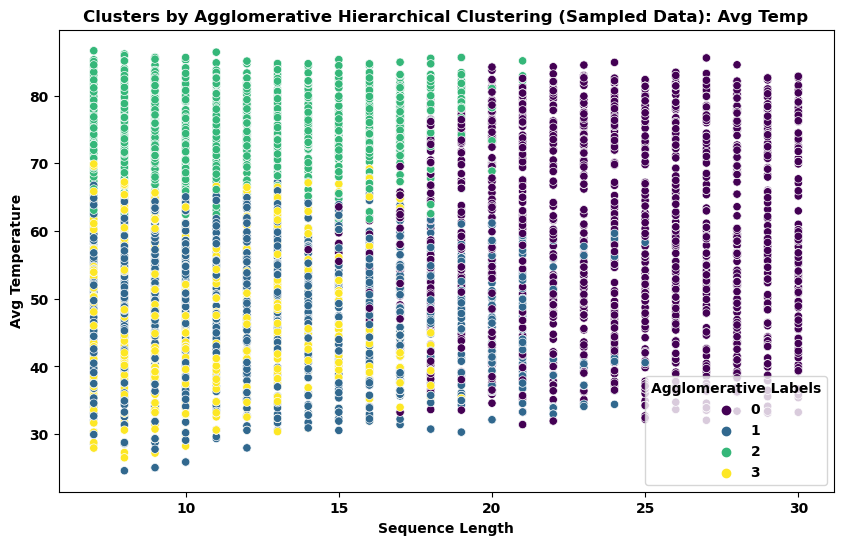

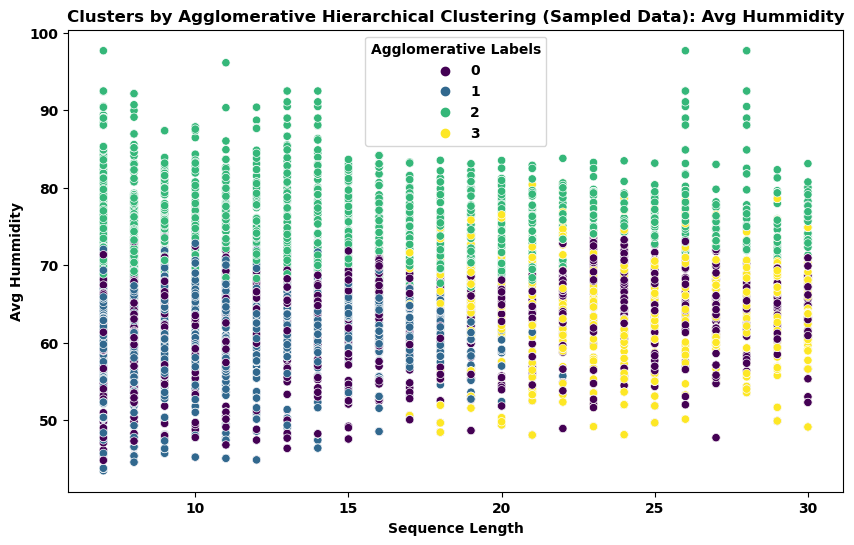

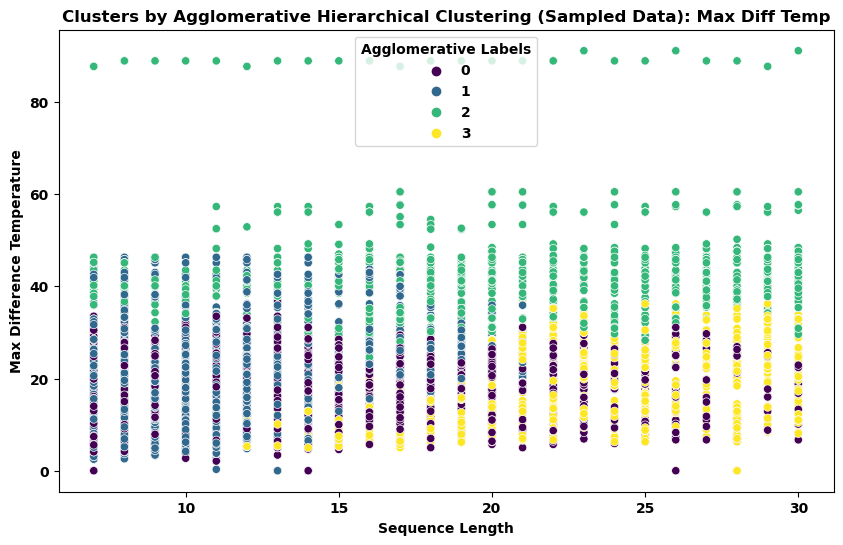

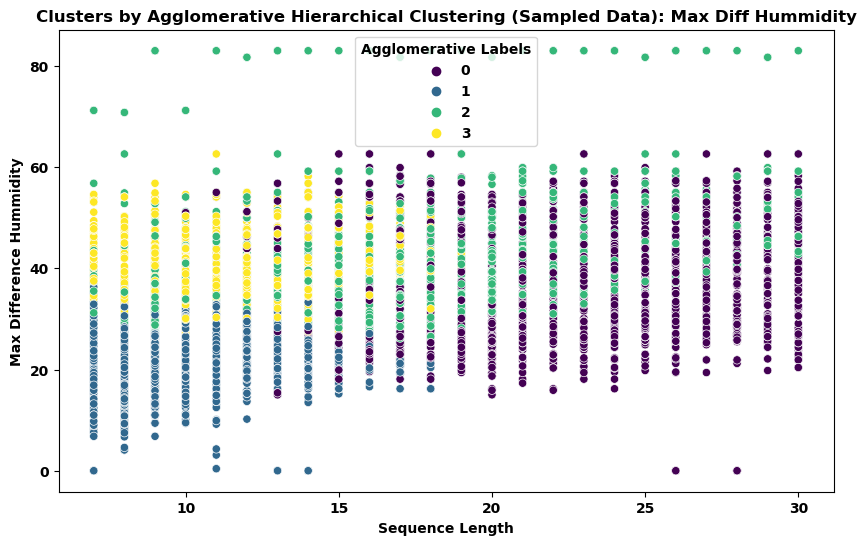

In [11]:
clusters_per_sequence = [4,4,4,4]
for i in range(len(sequences)):
    # Sample a subset of our data
    subset = sequences[i].sample(n=10000, random_state=42)

    # Standardize the subset
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i][sequences[i].columns[:3]])
    subset_scaled = scaler.transform(subset[subset.columns[:3]])

    # Fit Agglomerative Hierarchical Clustering
    agg_clustering = AgglomerativeClustering(n_clusters=clusters_per_sequence[i])
    subset['Agglomerative Labels'] = agg_clustering.fit_predict(subset_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Sequence Length', y= sequences[i].columns[2], hue='Agglomerative Labels', palette='viridis')
    plt.title('Clusters by Agglomerative Hierarchical Clustering (Sampled Data): ' + sequences[i].name)
    plt.show()


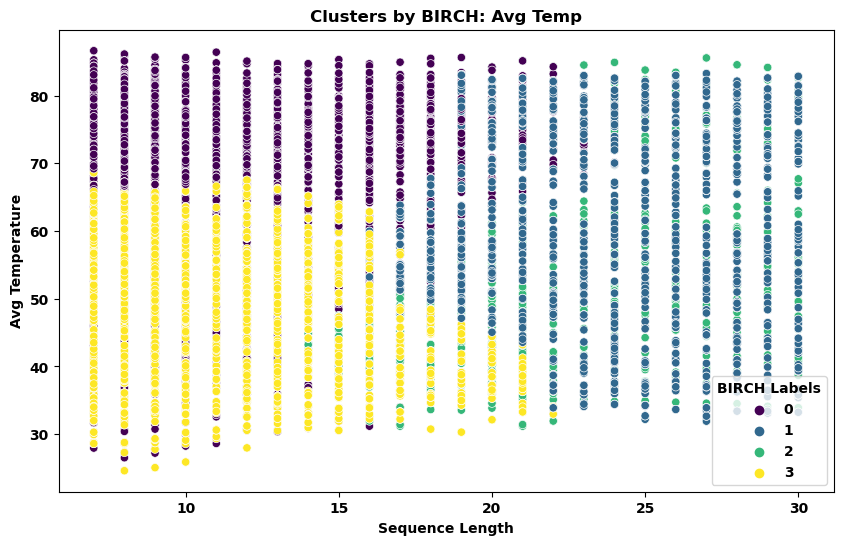

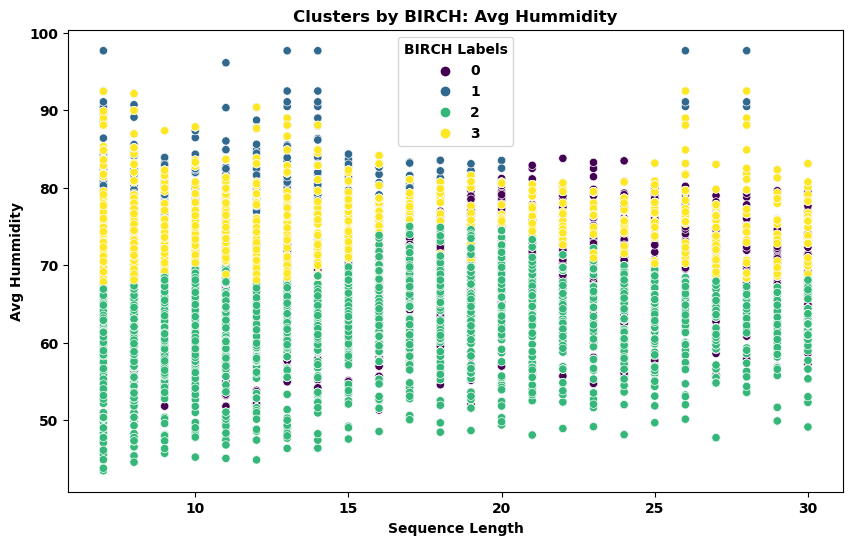

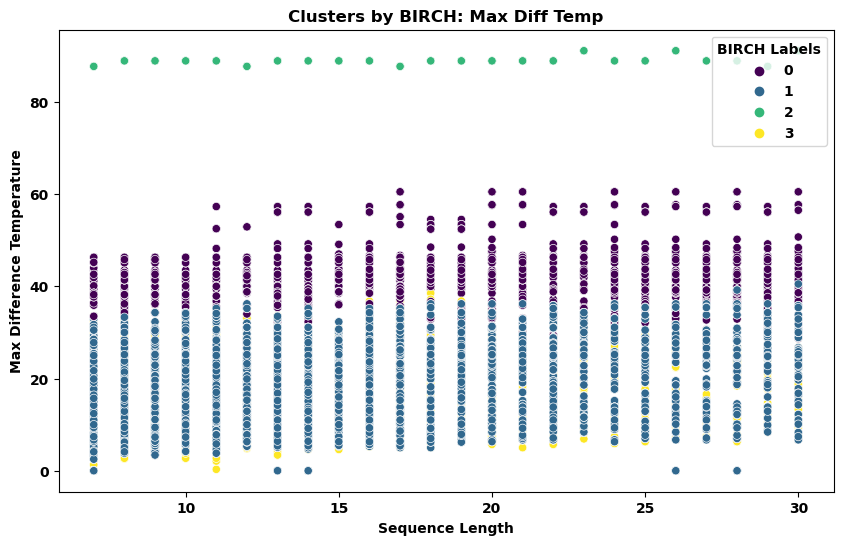

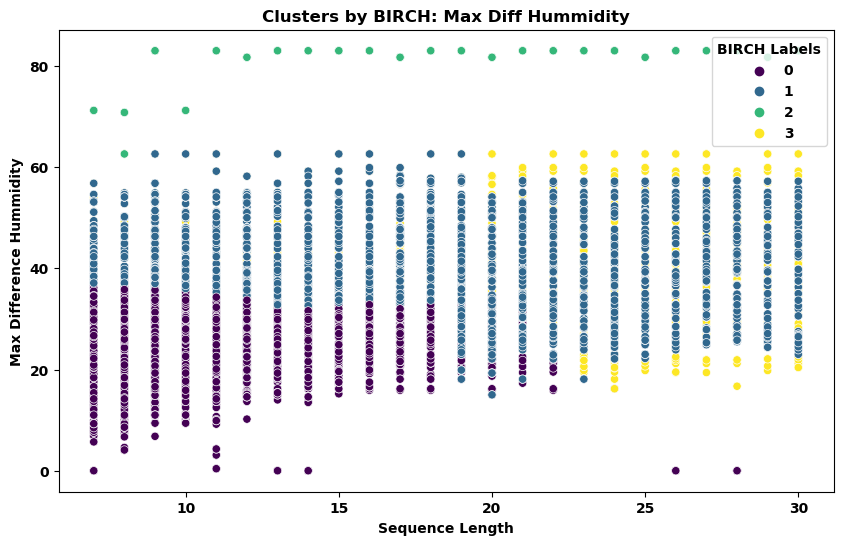

In [12]:
from sklearn.cluster import Birch
clusters_per_sequence = [4,4,4,4]
for i in range(len(sequences)):
    # Fit BIRCH
    birch = Birch(n_clusters=clusters_per_sequence[i])
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequences[i][sequences[i].columns[:3]])
    sequences[i]['BIRCH Labels'] = birch.fit_predict(sequences_scaled)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=sequences[i], x='Sequence Length', y=sequences[i].columns[2], hue='BIRCH Labels', palette='viridis')
    plt.title('Clusters by BIRCH: ' + sequences[i].name)
    plt.show()


In [13]:
# Check unique DBSCAN labels
for sequence_df in sequences:
    unique_dbscan_labels = sequence_df['DBSCAN Labels'].unique()
    print('Unique DBSCAN Labels for ' + sequence_df.name)
    print(unique_dbscan_labels)  



Unique DBSCAN Labels for Avg Temp
[0 1 2 3]
Unique DBSCAN Labels for Avg Hummidity
[ 0  1  2 -1  3  4  5]
Unique DBSCAN Labels for Max Diff Temp
[0 1 2 3 4 5]
Unique DBSCAN Labels for Max Diff Hummidity
[ 0  1  2 -1  3  4  5  6  7  8  9]


In [14]:
from sklearn.metrics import calinski_harabasz_score

for sequence_df in sequences:
    # Compute Calinski-Harabasz scores
    kmeans_score = calinski_harabasz_score(sequences_scaled, sequence_df['KMeans Labels'])
    birch_score = calinski_harabasz_score(sequences_scaled, sequence_df['BIRCH Labels'])
    print('for ' + sequence_df.name)
    print('kmeans score: ' + str(kmeans_score) + ', birch score: ' + str(birch_score))


for Avg Temp
kmeans score: 3746.0581787049773, birch score: 3691.6082116115927
for Avg Hummidity
kmeans score: 3657.7151833660637, birch score: 1769.8168639355763
for Max Diff Temp
kmeans score: 3974.199249310268, birch score: 2027.1084460417483
for Max Diff Hummidity
kmeans score: 6400.915551144995, birch score: 3686.869444036347


# section 5

In [20]:
# First, let's prepare the data as per the provided code

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Sort data by city and time
data = data.sort_values(['City', 'Time'])

# Initialize sequence list
sequences_avg_temp = []
sequences_max_diff_temp = []
sequences_avg_hu = []
sequences_max_diff_hu = []

# Iterate over each city
for city in data['City'].unique():
    city_data = data[data['City'] == city]
    
    # Create sequences of lengths varying from 7 to 30 days
    for seq_length in range(7, 31):
        for i in range(0, len(city_data), seq_length):
            sequence = city_data.iloc[i:i+seq_length]
            
            # Calculate the average temperature and humidity for the sequence
            avg_temp = sequence['Avg Temperature (°F)'].mean()
            avg_hu = sequence['Avg Humidity (%)'].mean()
            max_diff_temp = sequence['Avg Temperature (°F)'].max() - sequence['Avg Temperature (°F)'].min() 
            max_diff_hu = sequence['Avg Humidity (%)'].max() - sequence['Avg Humidity (%)'].min() 
            
            # Append the sequence data to our list
            sequences_avg_temp.append([city, seq_length, avg_temp])
            sequences_avg_hu.append([city, seq_length, avg_hu])
            sequences_max_diff_temp.append([city, seq_length, max_diff_temp])
            sequences_max_diff_hu.append([city, seq_length, max_diff_hu])
            
# Convert to DataFrame
sequences_avg_temp_df = pd.DataFrame(sequences_avg_temp, columns=['City', 'Sequence Length', 'Avg Temperature'])
sequences_avg_hu_df = pd.DataFrame(sequences_avg_hu, columns=['City', 'Sequence Length', 'Avg Humidity'])
sequences_max_diff_temp_df = pd.DataFrame(sequences_max_diff_temp, columns=['City', 'Sequence Length', 'Max Difference Temperature'])
sequences_max_diff_hu_df = pd.DataFrame(sequences_max_diff_hu, columns=['City', 'Sequence Length', 'Max Difference Humidity'])

# Define the sequence DataFrame list
sequences = [sequences_avg_temp_df, sequences_avg_hu_df, sequences_max_diff_temp_df, sequences_max_diff_hu_df]

# Now, we have our prepared data, let's proceed with the implementation of the methods.



In [22]:
# Set up a dictionary to store the results of each method for each sequence
method_results = {}

# Iterate over each sequence DataFrame
for sequence_df in sequences:
    # Standardize the data (excluding the 'City' column)
    scaler = StandardScaler()
    sequences_scaled = scaler.fit_transform(sequence_df.drop('City', axis=1))

    # Initialize the results for this sequence
    sequence_results = {}

    # Method 1: KMeans Clustering
    # Define a range of possible clusters
    clusters_range = range(2, 10)

    # Calculate WCSS (Within-Cluster-Sum-of-Squares) for different numbers of clusters
    wcss = []
    for n_clusters in clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(sequences_scaled)
        wcss.append(kmeans.inertia_)

    # Add the WCSS results to the sequence results
    sequence_results['KMeans'] = wcss

    # Method 2: DBSCAN
    # Fit DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(sequences_scaled)

    # Calculate silhouette score for DBSCAN if more than one cluster is identified
    if len(set(dbscan_labels)) > 1:
        dbscan_silhouette_score = silhouette_score(sequences_scaled, dbscan_labels)
    else:
        # If only one cluster is identified, assign a low silhouette score
        dbscan_silhouette_score = -1

    # Add the silhouette score to the sequence results
    sequence_results['DBSCAN'] = dbscan_silhouette_score

    # Add the sequence results to the method results
    method_results[sequence_df.columns[2]] = sequence_results

# Now, we have calculated the WCSS for KMeans and the silhouette score for DBSCAN for each sequence.
# Let's visualize these results.
method_results


{'Avg Temperature': {'KMeans': [17862.694550453634,
   10271.437714963628,
   6941.16460434026,
   5647.257886818747,
   4745.574552670513,
   3917.5045024528263,
   3371.791766411071,
   2997.976442422433],
  'DBSCAN': -1},
 'Avg Humidity': {'KMeans': [18014.736190582895,
   11072.059369972663,
   8819.71998252712,
   6914.269401367992,
   5724.409327176156,
   4998.343774248207,
   4307.100368060958,
   3833.3535983905067],
  'DBSCAN': 0.4837062979398333},
 'Max Difference Temperature': {'KMeans': [15693.41250884273,
   10842.559323186502,
   8081.495806231434,
   6842.427899421107,
   5866.253064655537,
   4963.242689852756,
   4181.5275876998985,
   3532.944140496237],
  'DBSCAN': 0.6687520193703332},
 'Max Difference Humidity': {'KMeans': [15111.08671936631,
   10522.038208603819,
   7903.790404190463,
   6586.685344070242,
   5650.088577950688,
   4892.30194223547,
   4347.004789324351,
   3885.4643865134553],
  'DBSCAN': 0.3761659050271249}}

From these results, it appears that DBSCAN did not perform well with this data as it only identified a single cluster for all sequences. On the other hand, KMeans was able to form multiple clusters. The WCSS (Within-Cluster-Sum-of-Squares) values decrease as the number of clusters increases, which is expected. This indicates that the clusters become more compact as the number of clusters increases.

Next, let's visualize these results. We'll plot the WCSS values for KMeans for different numbers of clusters. Since DBSCAN only identified a single cluster, its results are not very informative in this case, and we will not visualize them.

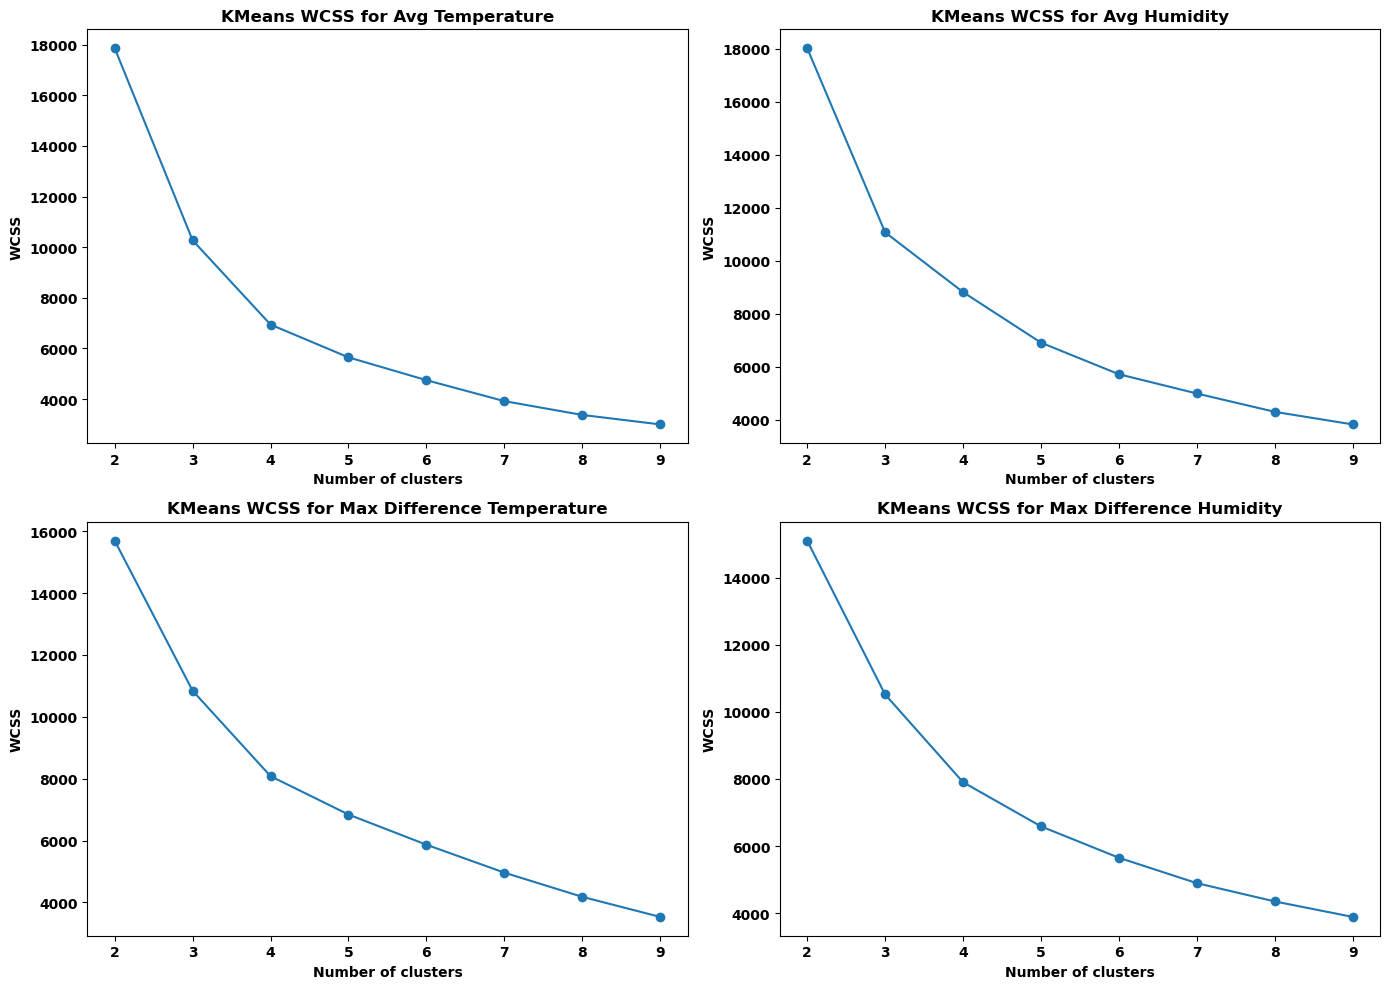

In [23]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Iterate over each sequence and plot the WCSS values for KMeans
for ax, (sequence_name, sequence_results) in zip(axs.flatten(), method_results.items()):
    ax.plot(clusters_range, sequence_results['KMeans'], marker='o')
    ax.set_title(f'KMeans WCSS for {sequence_name}')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('WCSS')

# Adjust the layout
plt.tight_layout()
plt.show()


# section 6

In [16]:
# Count the number of data points for each city
city_counts = sequences_df['City'].value_counts()

# Show the top 5 cities with the most data points
city_counts.head(5)


NameError: name 'sequences_df' is not defined

In [ ]:
# Create a new DataFrame for City 0
city0_df = sequences_df[sequences_df['City'] == 0].copy()

# Reset the index
city0_df.reset_index(drop=True, inplace=True)

# Display the first few rows of the new DataFrame
city0_df.head()


In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the simple moving average
city0_df['SMA_7'] = city0_df['Avg Temperature'].rolling(window=7).mean()

# Drop the first 6 rows which have NaN values in the SMA_7 column
city0_df = city0_df.iloc[6:]

# Calculate the mean squared error of the SMA predictions
sma_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['SMA_7'])

# Display the mean squared error
sma_mse


In [ ]:
# Plot the actual values and the SMA predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['SMA_7'], label='SMA Predictions')
plt.title('Actual Values vs SMA Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Simple Exponential Smoothing model
model = SimpleExpSmoothing(city0_df['Avg Temperature']).fit(smoothing_level=0.2)

# Make predictions
city0_df['SES_Predictions'] = model.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the SES predictions
ses_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['SES_Predictions'])

# Display the mean squared error
ses_mse


In [ ]:
# Plot the actual values and the SES predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['SES_Predictions'], label='SES Predictions')
plt.title('Actual Values vs SES Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(city0_df['Avg Temperature'], order=(1, 0, 0))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
arima_mse


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(city0_df['Avg Temperature'], order=(1, 0, 0))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
arima_mse


In [ ]:
# Plot the actual values and the ARIMA predictions
plt.figure(figsize=(14, 7))
plt.plot(city0_df['Avg Temperature'], label='Actual Values')
plt.plot(city0_df['ARIMA_Predictions'], label='ARIMA Predictions')
plt.title('Actual Values vs ARIMA Predictions for City 0')
plt.xlabel('Days')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()


# section 7

In [ ]:
from sklearn.cluster import KMeans

# List to hold the sum of squared distances
ssd = []

# Range of k values to try
k_values = range(1, 15)

# Perform KMeans for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sequences_scaled)
    ssd.append(kmeans.inertia_)

# Generate the elbow plot
plt.figure(figsize=(14, 7))
plt.plot(k_values, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define the p, d and q parameters to take any value between 0 and 2
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Generate all different combinations of p, d and q triplets
pdq_values = list(itertools.product(p_values, d_values, q_values))

# Create a variable to store the best model parameters
best_pdq = None
best_aic = np.inf

# Perform grid search
for pdq in pdq_values:
    try:
        # Fit the ARIMA model
        model = ARIMA(city0_df['Avg Temperature'], order=pdq)
        model_fit = model.fit()

        # Check if the current model's AIC is lower than the best AIC
        if model_fit.aic < best_aic:
            best_pdq = pdq
            best_aic = model_fit.aic
    except:
        continue

# Print the best p, d, q values
print(f'Best ARIMA parameters: {best_pdq}')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model with the optimal parameters
model = ARIMA(city0_df['Avg Temperature'], order=(2, 0, 2))
model_fit = model.fit()

# Make predictions
city0_df['ARIMA_Predictions'] = model_fit.predict(start=0, end=len(city0_df)-1)

# Calculate the mean squared error of the ARIMA predictions
arima_mse = mean_squared_error(city0_df['Avg Temperature'], city0_df['ARIMA_Predictions'])

# Display the mean squared error
print(arima_mse)
